In [1]:
library(tidyverse)
library(haven)
library(lubridate)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   mask

In [6]:
rain_data <- read_csv("data/weatherstats_vancouver_daily.csv") |> 
                select(date, starts_with('avg'), rain) |> 
                mutate(rain_flag = (rain > 0), yday = yday(date))
rain_split <- initial_split(rain_data, 0.75, strata = rain)
rain_training <- training(rain_split)
rain_testing <- testing(rain_split)
rain_training

Rows: 4000 Columns: 70
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (62): max_temperature, avg_hourly_temperature, avg_temperature, min_tem...
lgl   (5): solar_radiation, max_cloud_cover_4, avg_hourly_cloud_cover_4, avg...
date  (1): date
time  (2): sunrise, sunset

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


date,avg_hourly_temperature,avg_temperature,avg_hourly_relative_humidity,avg_relative_humidity,avg_hourly_dew_point,avg_dew_point,avg_hourly_wind_speed,avg_wind_speed,avg_hourly_pressure_sea,⋯,avg_health_index,avg_hourly_cloud_cover_4,avg_cloud_cover_4,avg_hourly_cloud_cover_8,avg_cloud_cover_8,avg_hourly_cloud_cover_10,avg_cloud_cover_10,rain,rain_flag,yday
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
2022-10-22,8.88,9.05,92.0,85.5,7.6,7.5,7.33,6.5,100.76,⋯,1.6,NA,NA,5.6,4.5,NA,NA,0.2,TRUE,295
2022-10-18,11.88,11.80,94.0,87.5,10.8,10.8,6.04,6.0,102.33,⋯,6.5,NA,NA,1.9,3.0,NA,NA,0.0,FALSE,291
2022-10-17,13.54,14.14,87.5,84.5,11.4,11.2,14.33,13.5,101.93,⋯,3.5,NA,NA,3.8,4.0,NA,NA,0.0,FALSE,290
2022-10-15,12.52,12.05,92.3,86.5,11.2,10.7,8.58,10.0,101.54,⋯,3.0,NA,NA,1.2,2.0,NA,NA,0.0,FALSE,288
2022-10-13,12.45,11.89,93.4,85.0,11.3,10.9,6.21,8.5,102.12,⋯,2.4,NA,NA,1.3,1.5,NA,NA,0.0,FALSE,286
2022-10-12,11.52,10.95,93.2,87.5,10.4,9.4,10.71,12.0,102.42,⋯,2.0,NA,NA,1.1,2.5,NA,NA,0.0,FALSE,285
2022-10-11,12.21,12.55,87.0,84.0,10.0,9.7,11.29,15.5,102.23,⋯,1.8,NA,NA,0.8,1.5,NA,NA,0.0,FALSE,284
2022-10-10,14.09,14.30,86.1,81.0,11.6,11.4,18.21,24.0,101.63,⋯,2.5,NA,NA,3.8,4.0,NA,NA,0.0,FALSE,283
2022-10-09,14.47,14.39,95.2,89.0,13.7,13.4,9.58,11.5,102.02,⋯,2.5,NA,NA,1.9,2.5,NA,NA,0.0,FALSE,282


Warning message:
“Removed 31 rows containing missing values (geom_point).”
Warning message:
“Removed 31 rows containing missing values (geom_point).”


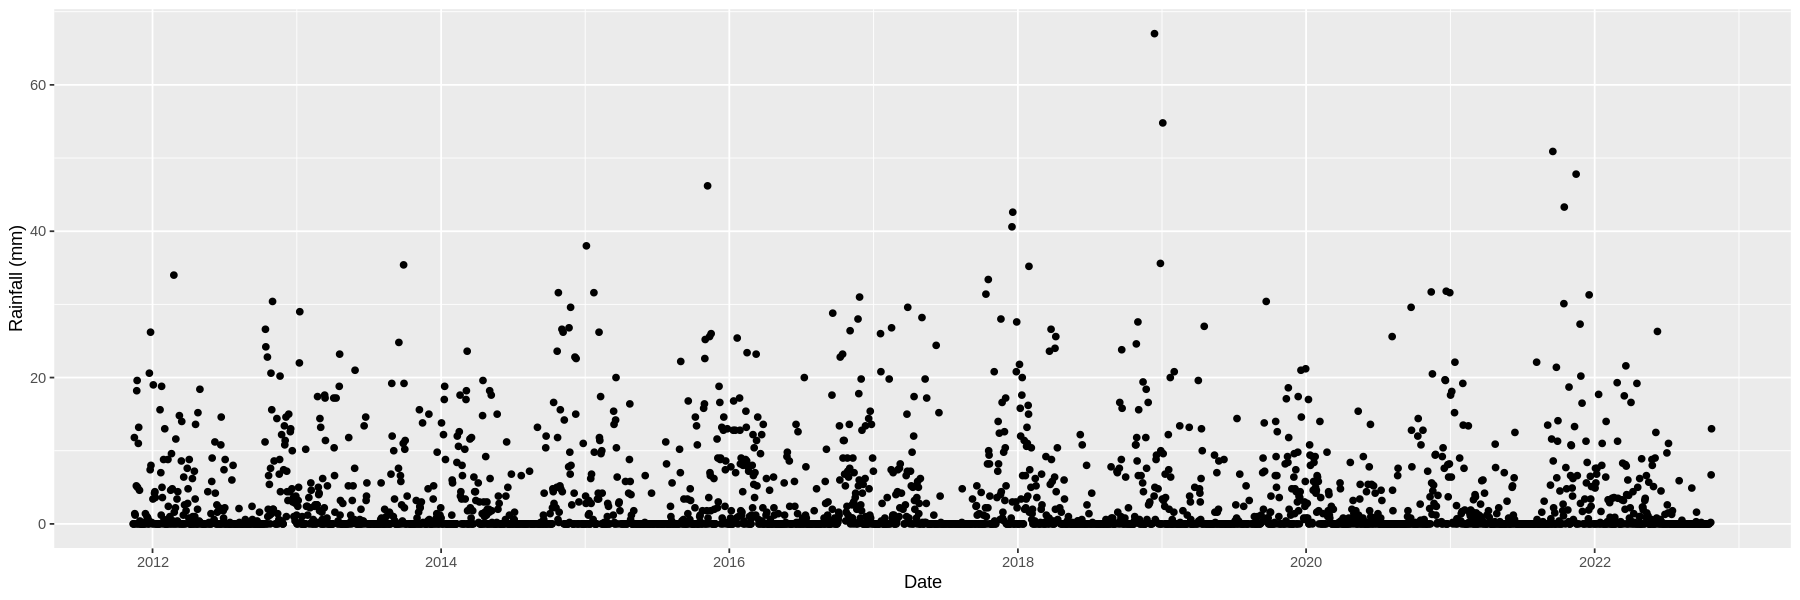

Warning message:
“Removed 31 rows containing missing values (geom_point).”


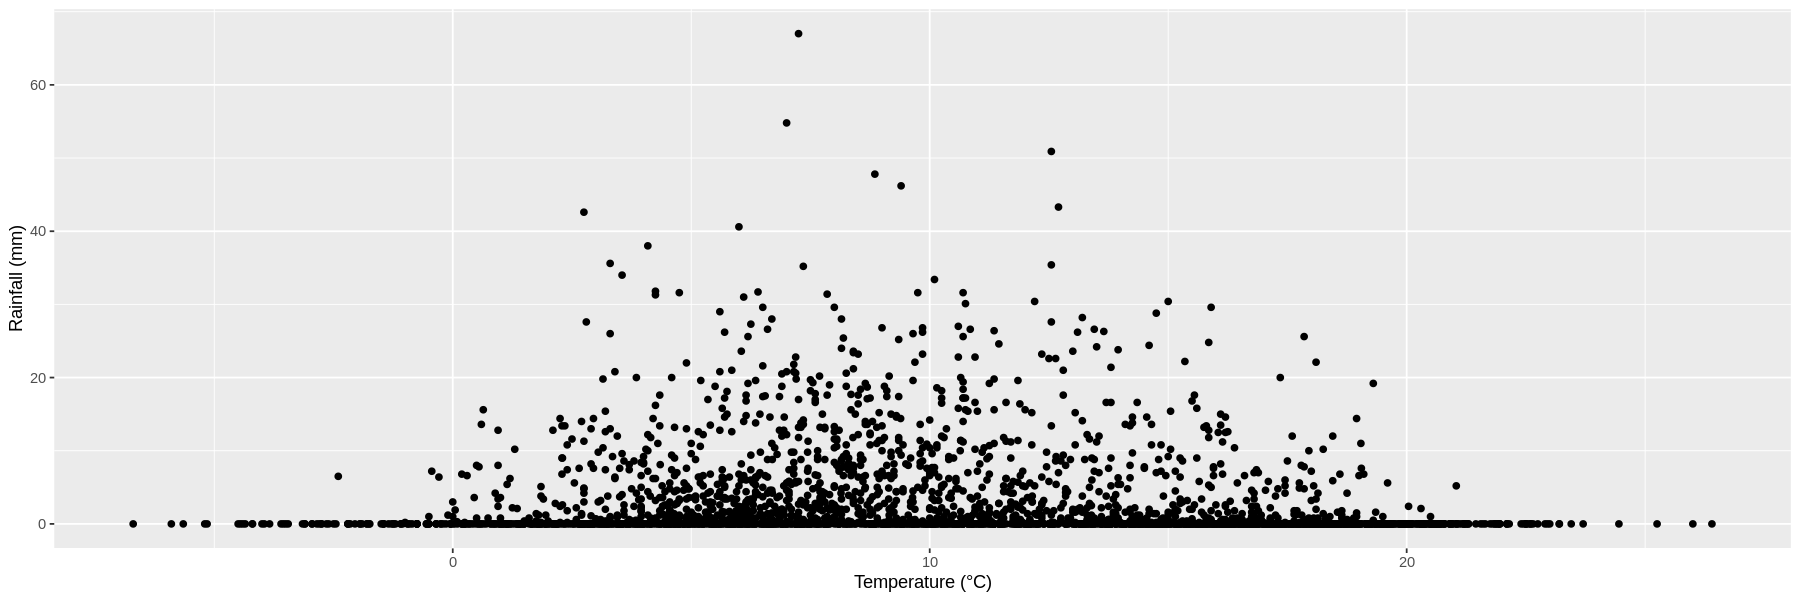

Warning message:
“Removed 31 rows containing missing values (geom_point).”


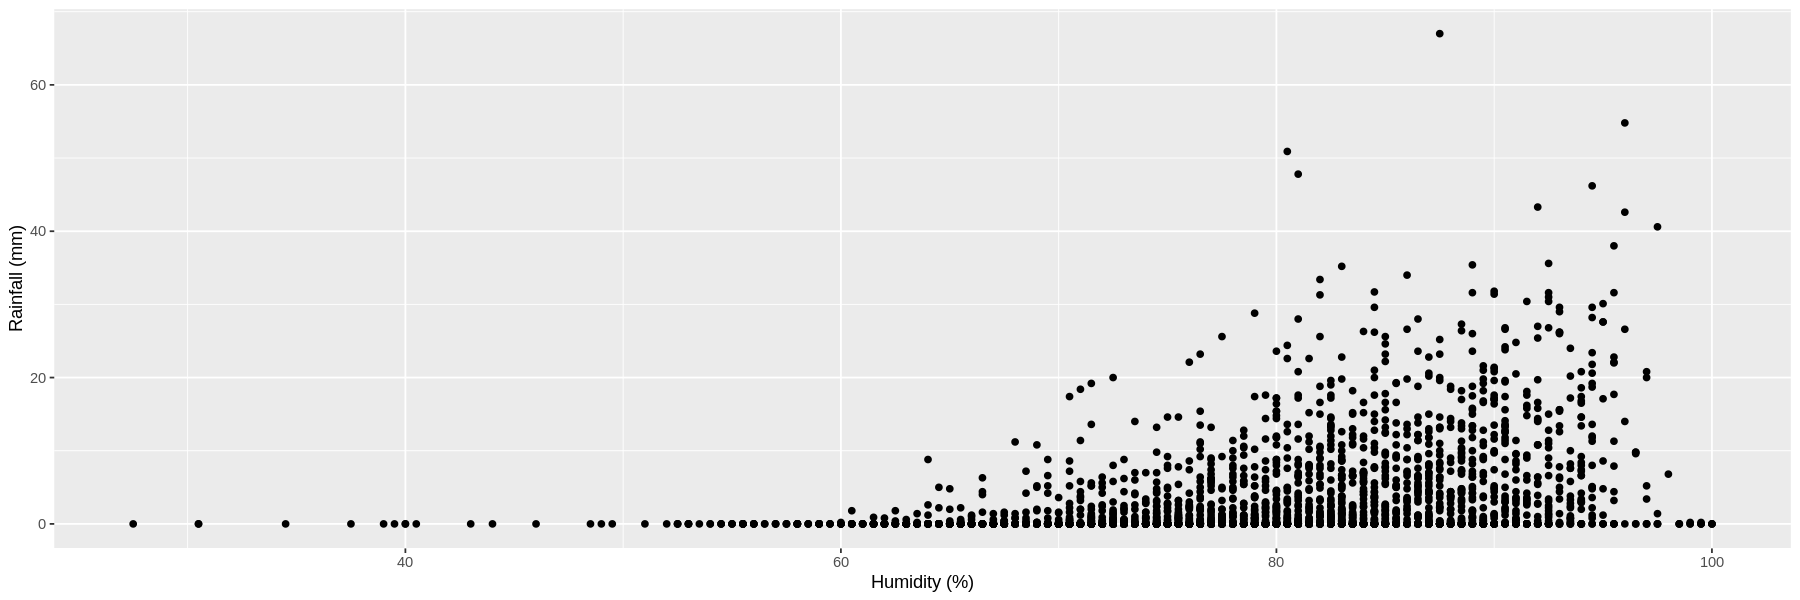

Warning message:
“Removed 31 rows containing missing values (geom_point).”


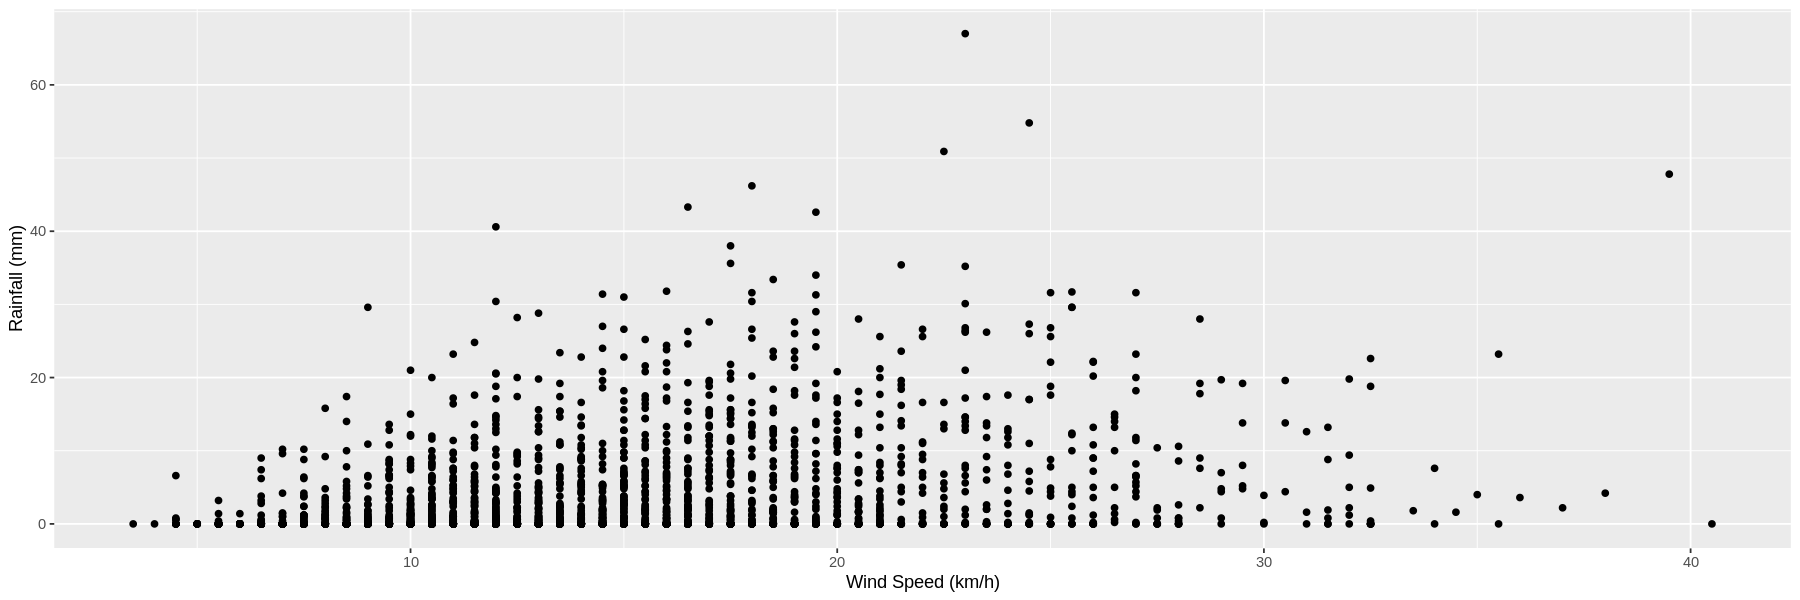

Warning message:
“Removed 30 rows containing missing values (position_stack).”


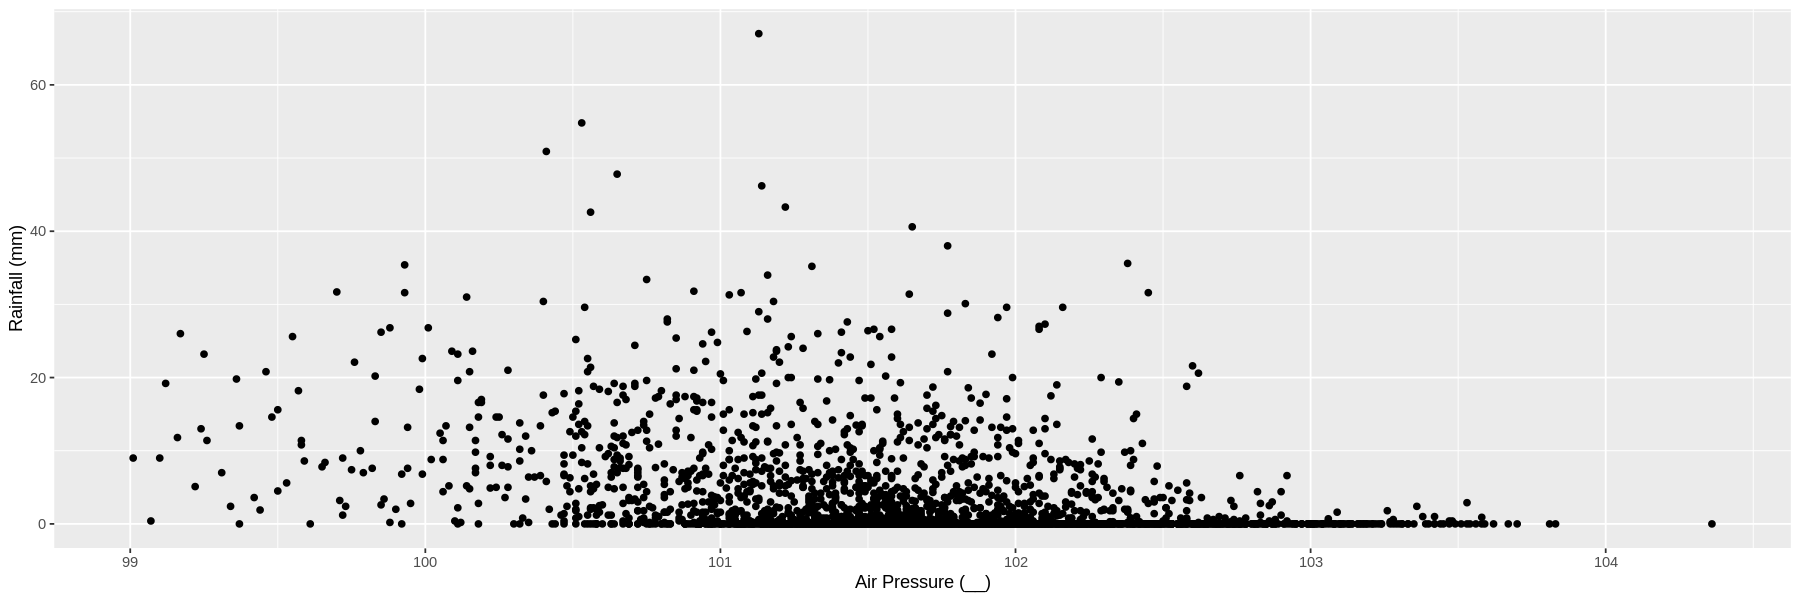

Warning message:
“Removed 30 rows containing missing values (position_stack).”


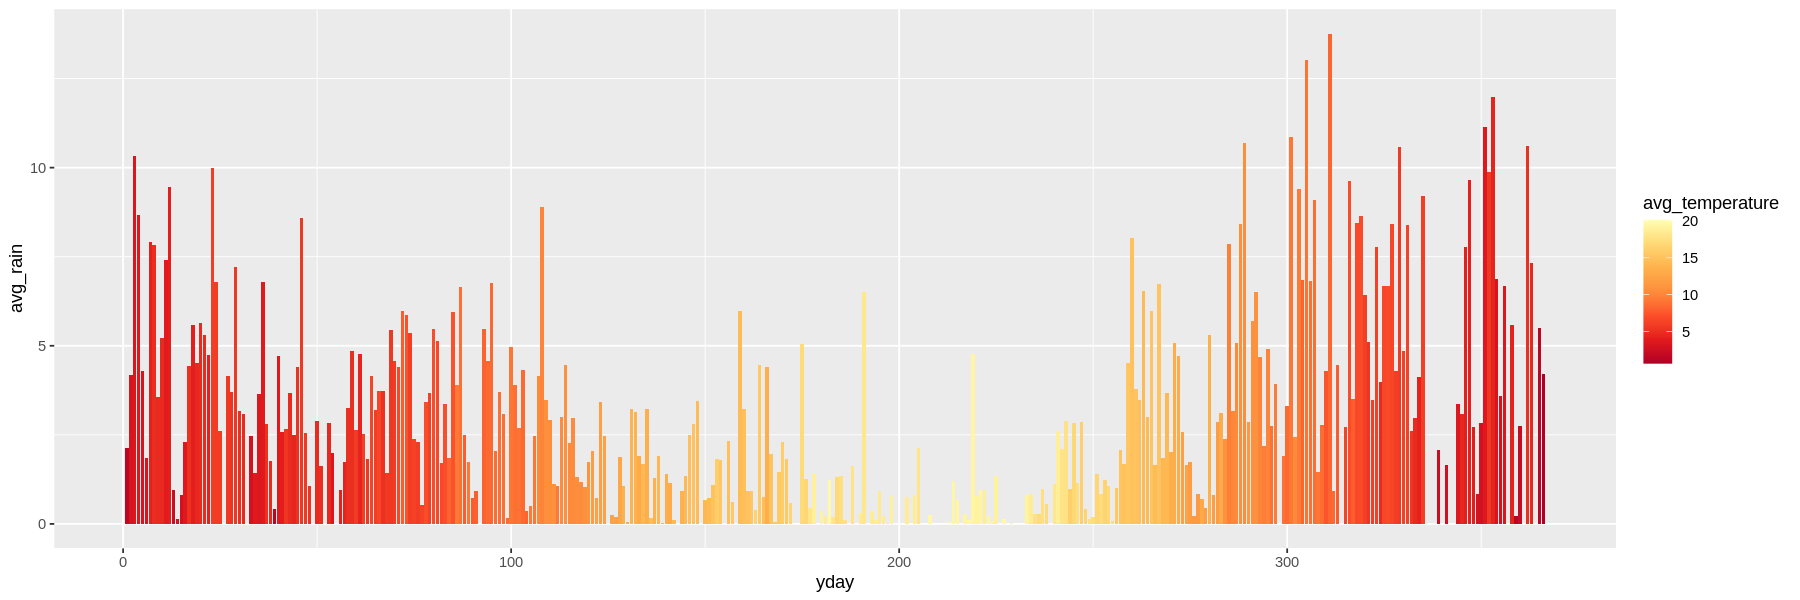

Warning message:
“Removed 30 rows containing missing values (position_stack).”


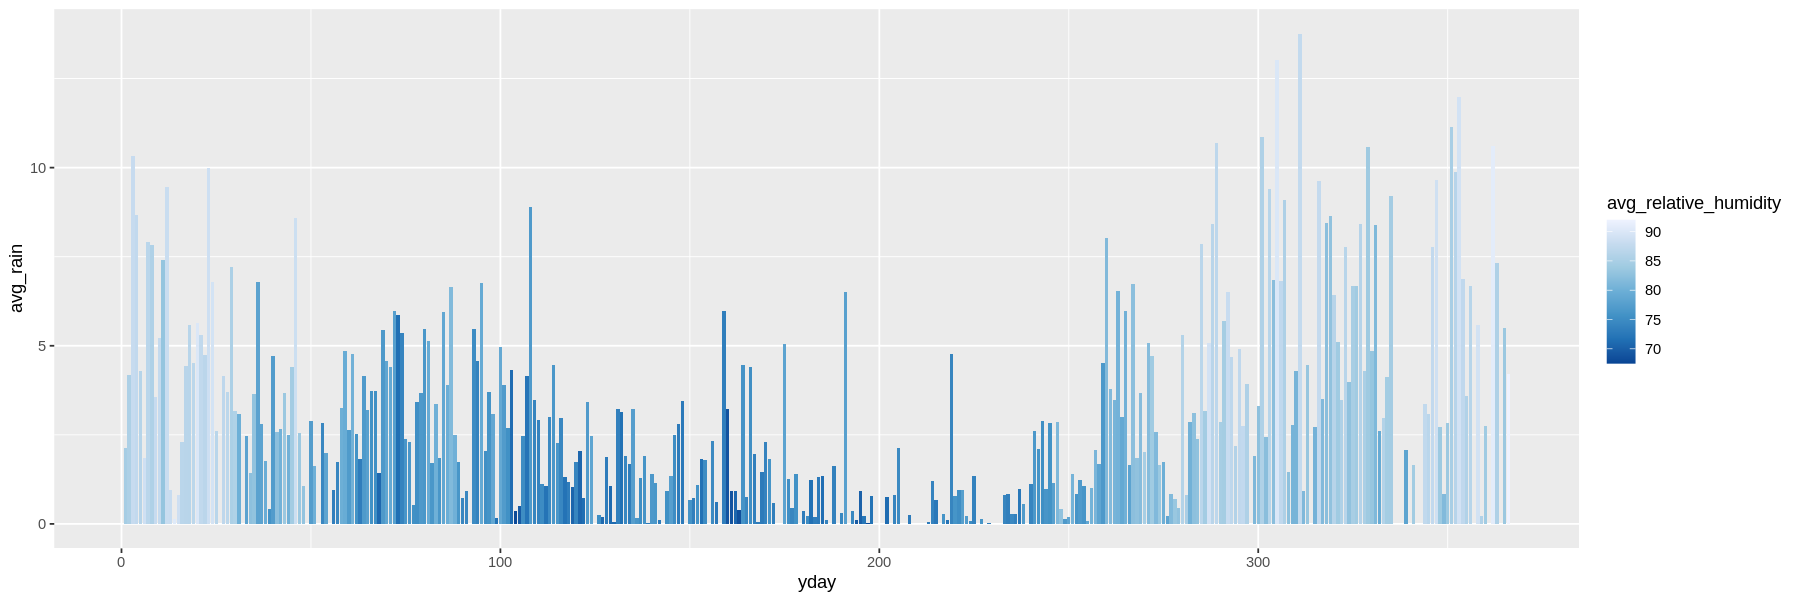

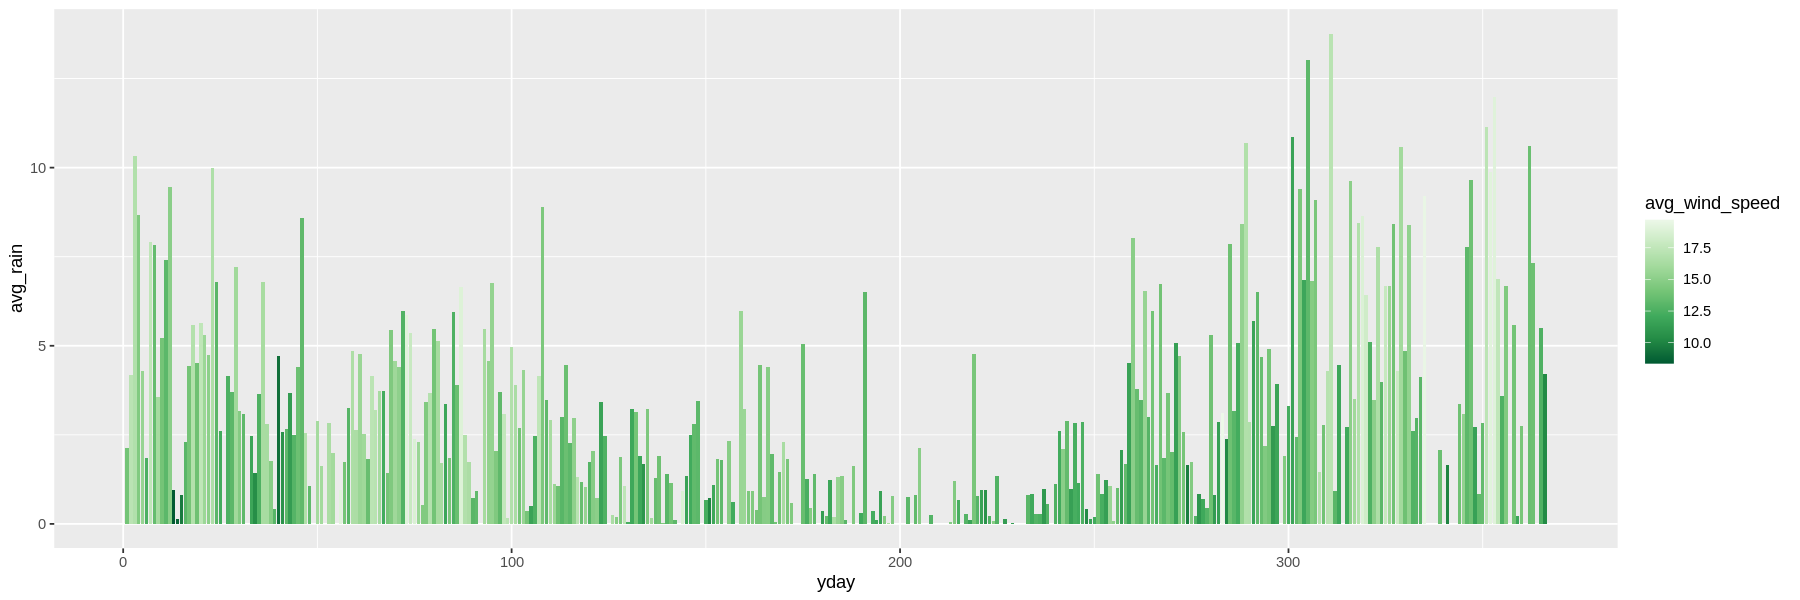

In [8]:
options(repr.plot.width = 15, repr.plot.height = 5)

# rain_humidity_plot <- ggplot(rain, aes(x = date, y = avg_relative_humidity)) + geom_point(aes(color = rain_flag, shape = rain_flag))
# rain_humidity_plot

# filter(rain_training, is.na(rain))

rain_over_time_plot <- ggplot(rain_training, aes(x = date, y = rain)) + geom_point() + labs(x = "Date", y = "Rainfall (mm)")
rain_over_time_plot


rain_temperature_plot <- ggplot(rain_training, aes(x = avg_temperature, y = rain)) + geom_point() + labs(x = "Temperature (°C)", y = "Rainfall (mm)")
rain_temperature_plot

# rain_compare_plot <- ggplot(rain, aes(x = avg_relative_humidity, y = avg_temperature)) + geom_point(aes(color = rain_flag, shape = rain_flag))
# rain_compare_plot
# rain_training
rain_humidity_plot <- ggplot(rain_training, aes(x = avg_relative_humidity, y = rain)) + geom_point() + labs(x = "Humidity (%)", y = "Rainfall (mm)")
rain_humidity_plot

rain_windspeed_plot <- ggplot(rain_training, aes(x = avg_wind_speed, y = rain)) + geom_point() + labs(x = "Wind Speed (km/h)", y = "Rainfall (mm)")
rain_windspeed_plot

rain_pressure_plot <- ggplot(rain_training, aes(x = avg_pressure_station, y = rain)) + geom_point() + labs(x = "Air Pressure (__)", y = "Rainfall (mm)")
rain_pressure_plot

# rain_time_plot <- ggplot(rain, aes(x = date, y = rain)) + geom_point(aes(color = rain_flag, alpha = 0.5))
# rain_time_plot

# rain_yday_plot <- ggplot(rain, aes(x = yday, y = rain)) + geom_point(aes(color = rain, shape = rain_flag, alpha = 0.5))
# rain_yday_plot

rain_summary <- rain_training |> group_by(yday) |> 
summarize(avg_rain = mean(rain), avg_relative_humidity = mean(avg_relative_humidity), avg_temperature = mean(avg_temperature), avg_wind_speed = mean(avg_wind_speed))
# rain_summary

# rain_summary_total_plot <- rain_summary |> ggplot(aes(x = yday, y = total_rain)) + geom_bar(stat = 'identity')
# rain_summary_total_plot

rain_summary_heat_plot <- rain_summary |> ggplot(aes(x = yday, y = avg_rain)) + geom_bar(stat = 'identity', aes(fill = avg_temperature)) + scale_fill_distiller(palette = 'YlOrRd', direction = -1)
rain_summary_humid_plot <- rain_summary |> ggplot(aes(x = yday, y = avg_rain)) + geom_bar(stat = 'identity', aes(fill = avg_relative_humidity)) + scale_fill_distiller(palette = 'Blues', direction = -1)
rain_summary_wind_plot <- rain_summary |> ggplot(aes(x = yday, y = avg_rain)) + geom_bar(stat = 'identity', aes(fill = avg_wind_speed)) + scale_fill_distiller(palette = 'Greens', direction = -1)
rain_summary_heat_plot
rain_summary_humid_plot
rain_summary_wind_plot

# rain_yday_hist <- ggplot(filter(rain, rain_flag == TRUE), aes(x = yday, y = rain)) + geom_bar(stat = 'identity', aes(fill = rain))
# rain_yday_hist

Notes:
We may use a method to find predictor variables
Remove dew point
Remove NAs because very few compared to all
Relevance to Vancouver
Future question: If model becomes more and more inaccurate, evidence for climate change